seaborn에서 타이타닉 데이터 가져오기

In [35]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


데이터셋 데이터 현황 정보

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


데이터셋 모양 확인

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic.loc[titanic['sex'] == 'male', 'sex_status'] = '1'
titanic.loc[titanic['sex'] == 'female', 'sex_status'] = '2'
titanic.loc[titanic['class'] == 'First', 'class_status'] = '1'
titanic.loc[titanic['class'] == 'Second', 'class_status'] = '2'
titanic.loc[titanic['class'] == 'Third', 'class_status'] = '3'

In [28]:
X = titanic[['sex_status', 'class_status', 'age']]
y = titanic['survived']

데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

데이터 전처리(스케일러)

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_imputed)

X_train_scaled = ss.transform(X_train_imputed)
X_test_scaled = ss.transform(X_test_imputed)

In [39]:
X_train_scaled

array([[-0.7243102 , -1.61413602,  1.2322632 ],
       [-0.7243102 , -0.40055118, -0.50048197],
       [-0.7243102 ,  0.81303367,  0.1926161 ],
       ...,
       [-0.7243102 ,  0.81303367,  0.88571416],
       [ 1.38062393, -1.61413602, -1.19358003],
       [-0.7243102 , -1.61413602, -0.65450376]])

In [40]:
X_test_scaled

array([[-7.24310201e-01,  8.13033667e-01,  2.73597664e-16],
       [-7.24310201e-01, -4.00551178e-01,  1.15605203e-01],
       [-7.24310201e-01,  8.13033667e-01, -7.31514655e-01],
       [ 1.38062393e+00, -4.00551178e-01, -1.80966720e+00],
       [ 1.38062393e+00,  8.13033667e-01, -1.19358003e+00],
       [ 1.38062393e+00, -1.61413602e+00, -2.69449278e-01],
       [ 1.38062393e+00,  8.13033667e-01,  2.73597664e-16],
       [-7.24310201e-01,  8.13033667e-01, -1.03955824e+00],
       [ 1.38062393e+00,  8.13033667e-01, -1.03955824e+00],
       [ 1.38062393e+00, -1.61413602e+00, -8.08525551e-01],
       [-7.24310201e-01, -1.61413602e+00,  5.77670580e-01],
       [-7.24310201e-01,  8.13033667e-01,  1.11674685e+00],
       [ 1.38062393e+00,  8.13033667e-01,  2.73597664e-16],
       [-7.24310201e-01,  8.13033667e-01,  3.85943068e-02],
       [-7.24310201e-01, -4.00551178e-01,  5.00659684e-01],
       [ 1.38062393e+00, -1.61413602e+00, -1.03955824e+00],
       [-7.24310201e-01, -1.61413602e+00

로지스틱 회귀 모델 훈련

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7907303370786517
0.8100558659217877


계수와 절편 확인, 결정트리 사용하기

In [42]:
print(lr.coef_, lr.intercept_)

[[ 1.2129963  -0.8650195  -0.33487539]] [-0.67767694]


결정트리 사용하기

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8778089887640449
0.7821229050279329


시각화

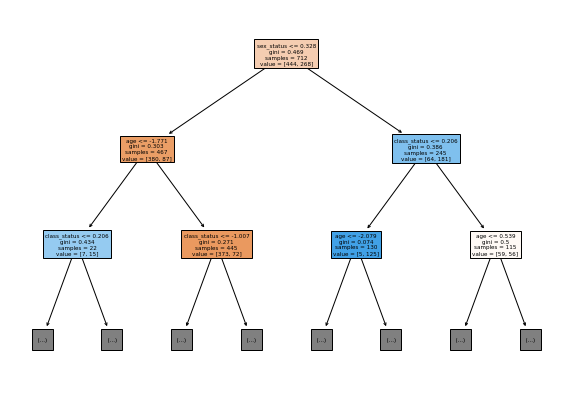

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['sex_status', 'class_status', 'age'])
plt.show()

가지치기

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8103932584269663
0.8044692737430168


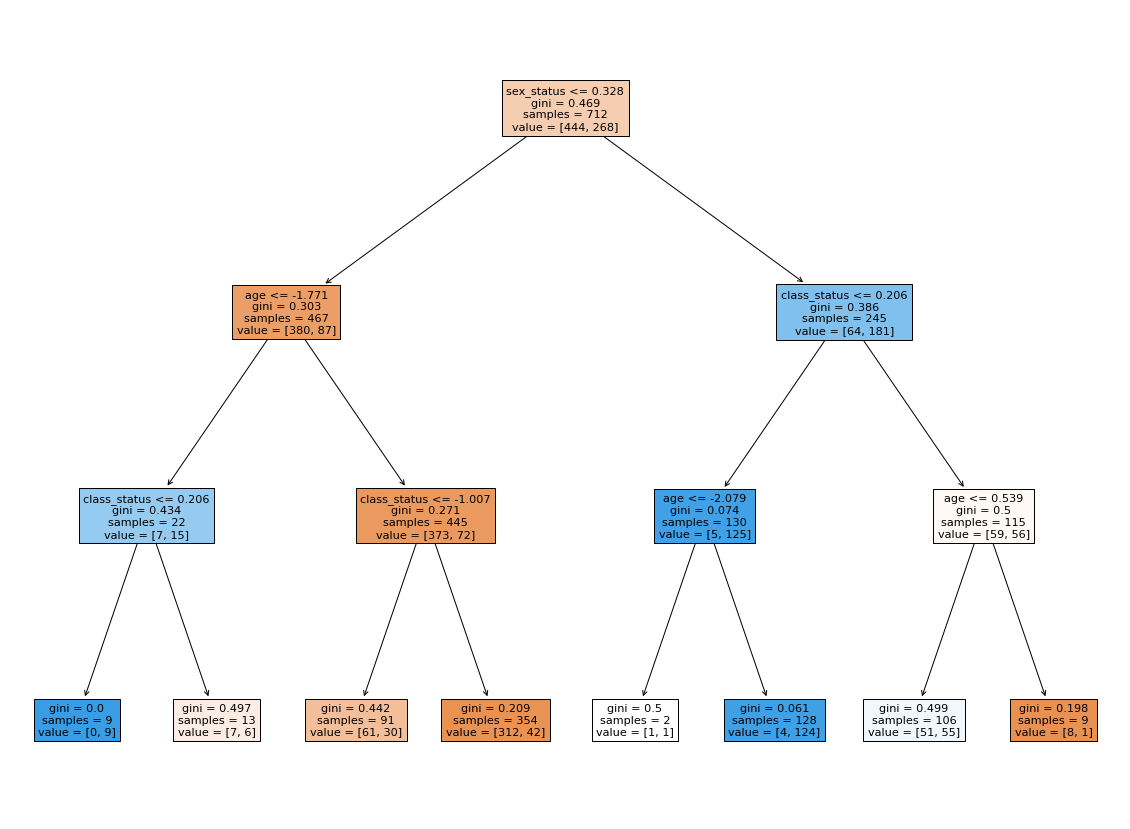

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['sex_status', 'class_status', 'age'])
plt.show()

특성 중요도 확인

In [57]:
dt.feature_importances_

array([0.65364846, 0.24665814, 0.0996934 ])

In [58]:
sum(dt.feature_importances_)

0.9999999999999999

불순도 범위 지정

0.8567415730337079
0.8268156424581006


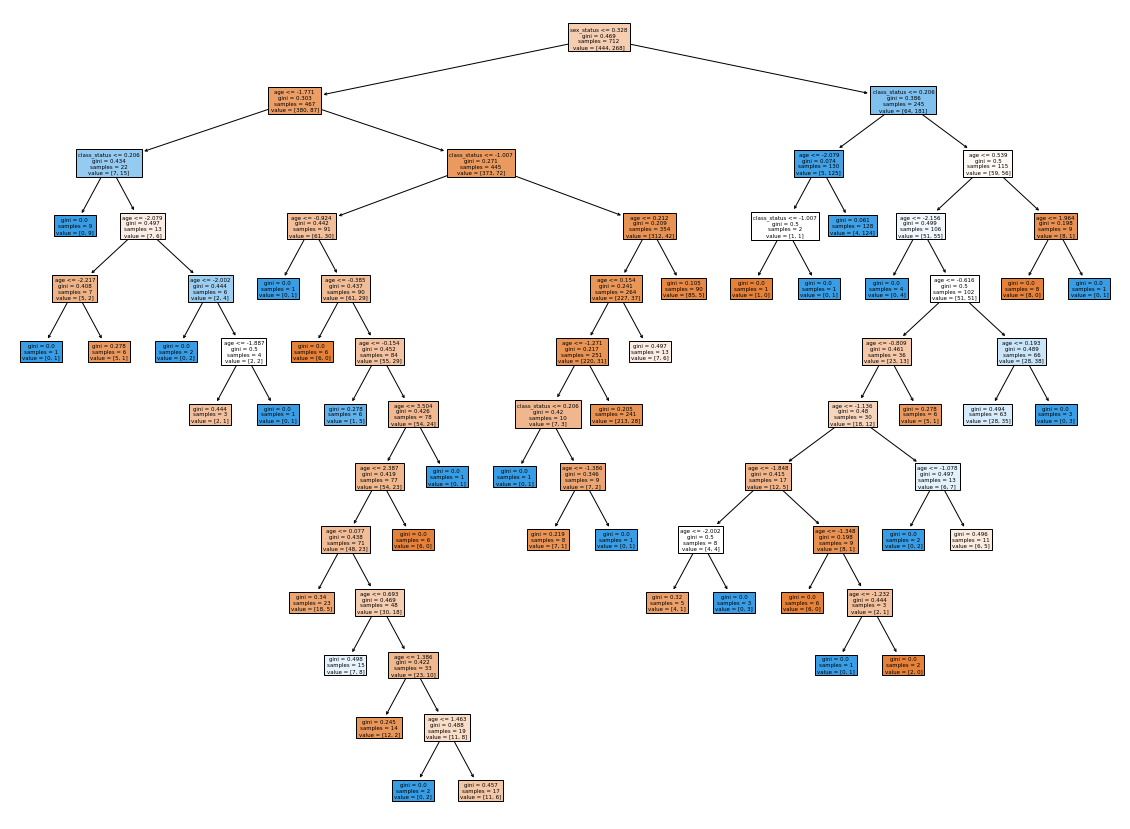

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['sex_status', 'class_status', 'age'])
plt.show()

최대 깊이 지정

0.8328651685393258
0.7821229050279329


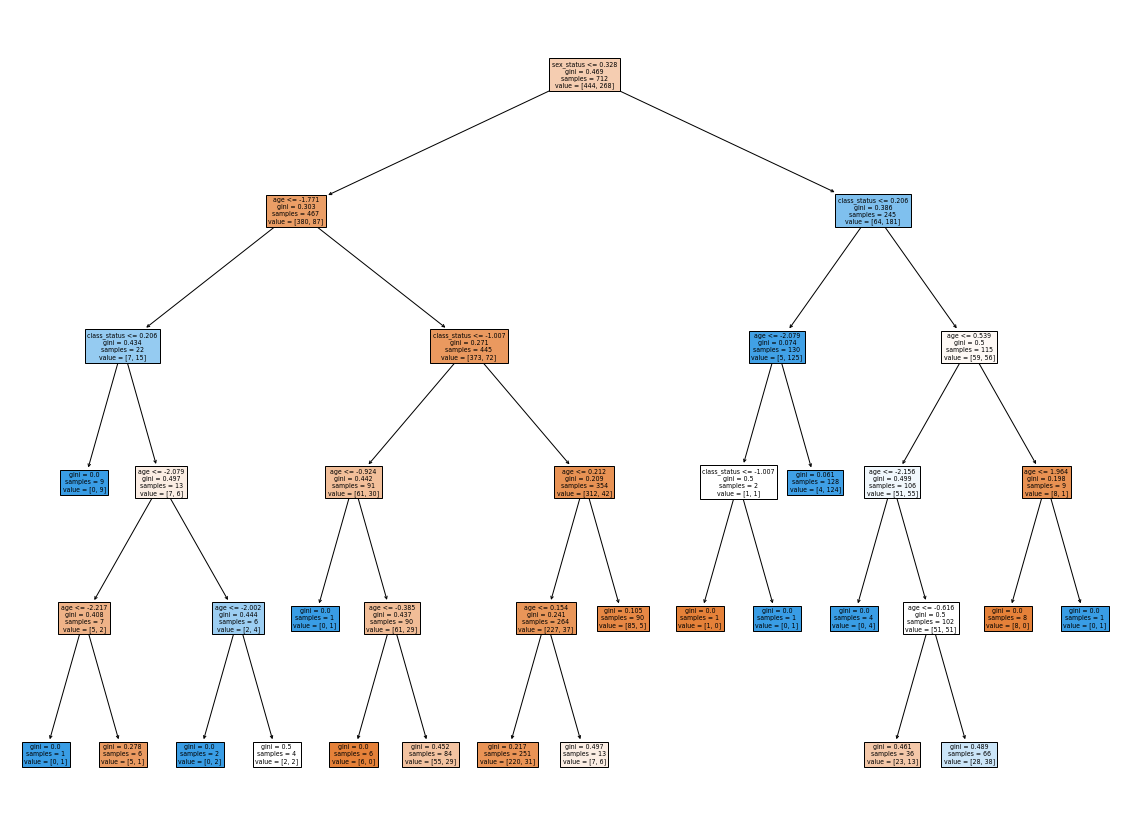

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['sex_status', 'class_status', 'age'])
plt.show()